In [10]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv('car.data',sep=',',header=0,names=["buying", "maint", "doors", "persons",'lug_boot','safety','Class'])
df[['buying']].values

array([['vhigh'],
       ['vhigh'],
       ['vhigh'],
       ...,
       ['low'],
       ['low'],
       ['low']], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

df['buying'] = le.fit_transform(df['buying'])
df[['maint']] = le.fit_transform(df[['maint']])
df[['doors']] = le.fit_transform(df[['doors']])
df[['persons']] = le.fit_transform(df[['persons']])
df[['lug_boot']] = le.fit_transform(df[['lug_boot']])
df[['safety']] = le.fit_transform(df[['safety']])
df[['Class']] = le.fit_transform(df[['Class']])

In [20]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [24]:
X=df[['buying','maint','doors','persons','lug_boot','Class']].values
X[0:7]

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 2]], dtype=int64)

In [23]:
Y=df['safety'].values
Y

array([2, 0, 1, ..., 1, 2, 0], dtype=int64)

In [26]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

C:\Users\BEVAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
        -1.22563179e+00,  1.22563179e+00,  5.10363057e-01],
       [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
        -1.22563179e+00,  1.22563179e+00,  5.10363057e-01],
       [ 1.34272909e+00,  1.34272909e+00, -1.34272909e+00,
        -1.22563179e+00,  7.09277656e-04,  5.10363057e-01],
       ...,
       [-4.46540306e-01, -4.46540306e-01,  1.34117500e+00,
         1.22421323e+00, -1.22421323e+00,  5.10363057e-01],
       [-4.46540306e-01, -4.46540306e-01,  1.34117500e+00,
         1.22421323e+00, -1.22421323e+00, -6.31342901e-01],
       [-4.46540306e-01, -4.46540306e-01,  1.34117500e+00,
         1.22421323e+00, -1.22421323e+00,  1.65206902e+00]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [29]:
yhat = neigh.predict(X_test)
yhat

array([0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0,
       2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1,

In [30]:
from sklearn import metrics

print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.4046242774566474


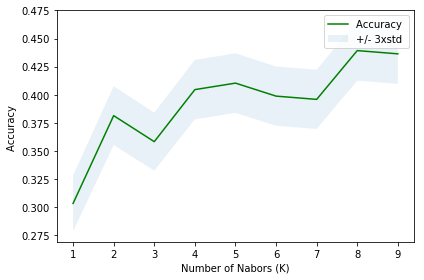

In [39]:
import matplotlib.pyplot as plt
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [40]:
mean_acc.max()

0.4393063583815029

In [41]:
mean_acc.argmax()+1

8

In [42]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.4393063583815029 with k= 8
